# Major Project Exam: Exploratory Data Analysis (EDA) and Machine Learning Integration

### Problem statement:
Perform a comprehensive analysis on the given dataset using Python, incorporating exploratory data analysis (EDA) and machine learning techniques. Your task is to preprocess the data, engineer features, select and train models, and evaluate their performance.

##### Additionally, document your process with Python comments explaining your code, and for each section, provide detailed conclusions and observations.


### Section 1: Understanding the Dataset

In [ ]:
#Importing libraries into python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.1	Load Data: Import the dataset into your working environment using appropriate methods or libraries.

In [ ]:
df=pd.read_csv('car_price_dataset.csv')
print(df)

       Unnamed: 0         car_name     brand     model  vehicle_age  \
0               0      Maruti Alto    Maruti      Alto            9   
1               1    Hyundai Grand   Hyundai     Grand            5   
2               2      Hyundai i20   Hyundai       i20           11   
3               3      Maruti Alto    Maruti      Alto            9   
4               4    Ford Ecosport      Ford  Ecosport            6   
...           ...              ...       ...       ...          ...   
15406       19537      Hyundai i10   Hyundai       i10            9   
15407       19540    Maruti Ertiga    Maruti    Ertiga            2   
15408       19541      Skoda Rapid     Skoda     Rapid            6   
15409       19542  Mahindra XUV500  Mahindra    XUV500            5   
15410       19543       Honda City     Honda      City            2   

       km_driven seller_type fuel_type transmission_type  mileage  engine  \
0         120000  Individual    Petrol            Manual    19.70     

#### 1.2	Checking Data Shape: Determine the shape of your dataset, including the number of rows and columns.

In [ ]:
#Checking the shape of the dataset
print("<<<<The shape of the dataset car_dekho is given by>>>>",df.shape)

<<<<The shape of the dataset car_dekho is given by>>>> (15411, 14)


In [ ]:
#Shape of the dataset consists of 15411 rows and 14 columns

#### 1.3	View Data: Display the first and last few rows of the dataset and summarize any initial insights.

In [ ]:
#Print the first five rows of the dataset
print("The first five rows of the car_dekho dataset are:\n")
df.head(5)

# In the dataset we have features like car_name, brand, model, vehicle_age, km_driven,
#seller_type, fuel_type, mileage, engine, max_power, seatsand and the label selling_price .
# It appears that we have both numerical and categorical features.

The first five rows of the car_dekho dataset are:



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
#Print the last five rows of the dataset
print("The last five rows of the car_dekho dataset are:\n")
df.tail(5)

The last five rows of the car_dekho dataset are:



,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000
15410,19543,Honda City,Honda,City,2,13000,Dealer,Petrol,Automatic,18.00,1497,117.60,5,1200000


### Section 2: Initial Data Examination

#### 2.1	Dataset Information: Provide a concise summary of the dataset, including the number of non-null entries, and explain what this reveals.

In [ ]:
#A concise summary of the dataset
# First drop the first column of the dataset
df = df.drop(columns=['Unnamed: 0'])
# We have extra column called unnamed,it is an auto created index that need to be dropped
df.info()
# We have both object and numerical data types included in the dataset
# We have dtypes: 2-float, 5-int, 6-object variables in the dataset making a total of 13 features after removing unnamed column, The dataset consumed memory usage of 1.5+ MB in a 64-bit
# We have five integer columns (vehicle_age, km_driven, engine, seats, and selling_price)
# Float columns: two columns (max_power, mileage)
#Car_name, brand, model, seller_type, fuel_type, and transmission_type are the six columns that make up the object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


#### 2.2 Inspect Data Types: Check data type of each column in the dataset. If columns need any data type conversion, update the data type accordingly and describe the rationale behind the conversions.

In [ ]:
#Inspect features data types and
df.dtypes

# Create a variable and assign it to numerical features only
numerical_features = df.select_dtypes(include='number')
print(".......Numerical features are:.......\n",numerical_features)
# Create a variable and assign it to categorical features only
categorical_features = df.select_dtypes(exclude='number')
print(".......Categorical features are:.......\n",categorical_features)

#All object data type features were converted to categorical data type



.......Numerical features are:.......
        vehicle_age  km_driven  mileage  engine  max_power  seats  \
0                9     120000    19.70     796      46.30      5   
1                5      20000    18.90    1197      82.00      5   
2               11      60000    17.00    1197      80.00      5   
3                9      37000    20.92     998      67.10      5   
4                6      30000    22.77    1498      98.59      5   
...            ...        ...      ...     ...        ...    ...   
15406            9      10723    19.81    1086      68.05      5   
15407            2      18000    17.50    1373      91.10      7   
15408            6      67000    21.14    1498     103.52      5   
15409            5    3800000    16.00    2179     140.00      7   
15410            2      13000    18.00    1497     117.60      5   

       selling_price  
0             120000  
1             550000  
2             215000  
3             226000  
4             570000  
...   

In [ ]:
#Convert all categorical_features  from object data type to categorical data type
for columname in categorical_features:
    df[columname] = df[columname].astype('category')
df.dtypes



,0
car_name,category
brand,category
model,category
vehicle_age,int64
km_driven,int64
seller_type,category
fuel_type,category
transmission_type,category
mileage,float64
engine,int64


#### 2.3 Summary Statistics: Generate summary statistics for the numerical columns and interpret what these statistics tell you about the data.

In [ ]:
#Summary statistics for all numeric features
print("Summary statistics for all numerical features is as follows: ")
print(numerical_features.describe())


Summary statistics for all numerical features is as follows: 
        vehicle_age     km_driven       mileage        engine     max_power  \
count  15411.000000  1.541100e+04  15411.000000  15411.000000  15411.000000   
mean       6.036338  5.561648e+04     19.701151   1486.057751    100.588254   
std        3.013291  5.161855e+04      4.171265    521.106696     42.972979   
min        0.000000  1.000000e+02      4.000000    793.000000     38.400000   
25%        4.000000  3.000000e+04     17.000000   1197.000000     74.000000   
50%        6.000000  5.000000e+04     19.670000   1248.000000     88.500000   
75%        8.000000  7.000000e+04     22.700000   1582.000000    117.300000   
max       29.000000  3.800000e+06     33.540000   6592.000000    626.000000   

              seats  selling_price  
count  15411.000000   1.541100e+04  
mean       5.325482   7.749711e+05  
std        0.807628   8.941284e+05  
min        0.000000   4.000000e+04  
25%        5.000000   3.850000e+05  
50% 

In [ ]:
# Oldest car in the dataset is 29 years old
#Average age of the vehicles in the dataset is 6 years
#At least half of the vehicles are only 6 years old
# There is less variation in the cars ages with standard deviation of 3
# Average selling price of the vehicles is around 774,971.1
# There is high variation in vehicle selling price, a few of the vehicles are priced high contributiong to high standard deviation
#Most cars have five seats five is the median and mode

#### 2.4 Provide detailed comments that explain your understanding of the data.

In [ ]:
#Summary od the dataset:
# The dataset contains 15411 rows and 14 columns
# The "Non-Null Count" equals the total number of rows (15411) meaning all columns have no missing values.
# The dataset contains numerical and Object data types which converted into categorical datatype in question 2.2
# Summary Stats:
#The average engine size is approximately 1486
#Car Selling price ranges from approximately 775,000 on average to 39.5 million.Strong right skewed meaning we have a few cars which are more expensive
#The most expensive vehicle cost 39,500,000
#Half of the vehicles are priced at + or - 556,000

### Section 3: Data Cleaning

#### 3.1 Handling Missing Values: Identify missing values in the dataset and describe how you handled them, including your chosen method.

In [ ]:
#Checking missing values in eaach coulumn and rows
print(df.isnull().sum())

#Below data results dispaly that the dataset does not have missing values

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


#### 3.2 Handling Duplicates: Check for duplicate rows in the dataset and describe your approach to handling any duplicates found.

In [ ]:
# Checking duplicates row entries in the dataset
print(df.duplicated().sum())

# We have 167 duplicate entries in the dataset. We will remove them in the nexy step
print(df.drop_duplicates(inplace=True)) # Set index true will permanantly remove duplicates


167
None


In [ ]:
# Verifying if we still have duplicates
print(df.duplicated().sum())


0


In [ ]:
#Since we removed 167 duplicates, now the share of the dataset has changed
print(df.shape)

# Now df has 15244 rows and 13 columns

(15244, 13)


In [ ]:
#drop car name
# df = df.drop(columns=['car_name'],inplace=True)

In [ ]:
#Reset index
df.reset_index(drop=True, inplace=True)
print(df.tail())

              car_name     brand   model  vehicle_age  km_driven seller_type  \
15239      Hyundai i10   Hyundai     i10            9      10723      Dealer   
15240    Maruti Ertiga    Maruti  Ertiga            2      18000      Dealer   
15241      Skoda Rapid     Skoda   Rapid            6      67000      Dealer   
15242  Mahindra XUV500  Mahindra  XUV500            5    3800000      Dealer   
15243       Honda City     Honda    City            2      13000      Dealer   

      fuel_type transmission_type  mileage  engine  max_power  seats  \
15239    Petrol            Manual    19.81    1086      68.05      5   
15240    Petrol            Manual    17.50    1373      91.10      7   
15241    Diesel            Manual    21.14    1498     103.52      5   
15242    Diesel            Manual    16.00    2179     140.00      7   
15243    Petrol         Automatic    18.00    1497     117.60      5   

       selling_price  
15239         250000  
15240         925000  
15241         425

#### 3.3 Outliers removal: Check if there are any outliers and remove them using graphical/non-graphical methods.

In [ ]:
#Checking how many outliers do we have for each feature
numerical_features = df.select_dtypes(include=['int64','float64'])
outliers = []
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"Number of outliers in {col}: {len(outliers)}")



Number of outliers in vehicle_age: 154
Number of outliers in km_driven: 464
Number of outliers in mileage: 87
Number of outliers in engine: 2103
Number of outliers in max_power: 853
Number of outliers in seats: 2477
Number of outliers in selling_price: 1371


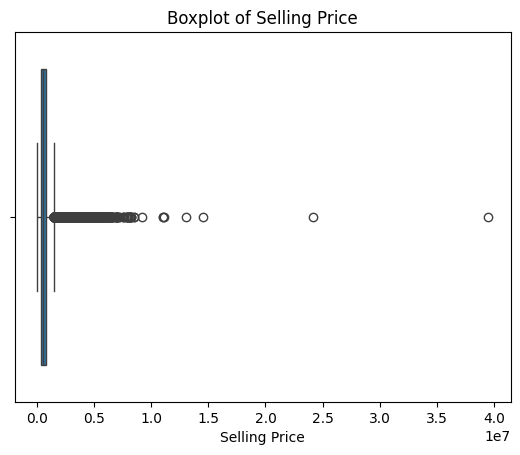

In [ ]:
sns.boxplot(df, x='selling_price') # Corrected argument order and column name
plt.title('Boxplot of Selling Price')
plt.xlabel('Selling Price')
plt.show()

In [ ]:
def cap_outliers_iqr(df, numerical_features):
  new_df=df.copy()
  for column in numerical_features:
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    new_df[column] = new_df[column].clip(lower_bound, upper_bound)
  return new_df

new_df = cap_outliers_iqr(df, numerical_features.columns)

print('Display data shape before removing outliers',df.shape)
print('Display data shape after removing outliers',new_df.shape)

if df.shape==new_df.shape:
    print('No rows were removed')
else:
    print('Please check,some of the rows were removed')




Display data shape before removing outliers (15244, 13)
Display data shape after removing outliers (15244, 13)
No rows were removed


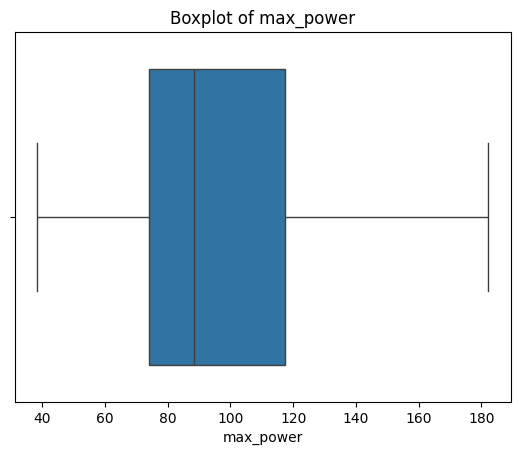

In [ ]:
#draw a boxplot
sns.boxplot(new_df, x='max_power') # Corrected argument order and column name
plt.title('Boxplot of max_power')
plt.xlabel('max_power')
plt.show()

In [ ]:

numerical_columns = df.select_dtypes(include=['Int64', 'float64'])
outliers = []
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Number of outliers removed from {column}: {len(outliers)}")



Number of outliers removed from vehicle_age: 0
Number of outliers removed from km_driven: 0
Number of outliers removed from mileage: 0
Number of outliers removed from engine: 0
Number of outliers removed from max_power: 0
Number of outliers removed from seats: 0
Number of outliers removed from selling_price: 0


In [ ]:
print(new_df.shape)

(15244, 13)


#### 3.4 Add python comments to explain the observations.

In [ ]:
'''We have used IQR and limits formular to identified 7509 total number of outliers.
   Seat and engine have the highest number of ouliers.
   Selling price has 1371 and max_power with 853 ourliers.
   Mileage and vehicle age has relatively lowest outliers.
   Lastly we applied Limits formula to exclude outliers from the dataset.
   We see that afre removing outliers the dataset shape is given by 10960 rows and 13 columns
   certain rows were dropped as they contained only outlier values.'''


'We have used IQR and limits formular to identified 7509 total number of outliers.\n   Seat and engine have the highest number of ouliers.\n   Selling price has 1371 and max_power with 853 ourliers.\n   Mileage and vehicle age has relatively lowest outliers.\n   Lastly we applied Limits formula to exclude outliers from the dataset.\n   We see that afre removing outliers the dataset shape is given by 10960 rows and 13 columns\n   certain rows were dropped as they contained only outlier values.'

### Section 4: Data Analysis

#### 4.1 Univariate Analysis of numeric features: Generate histograms for numerical data and infer insights from these visualizations.

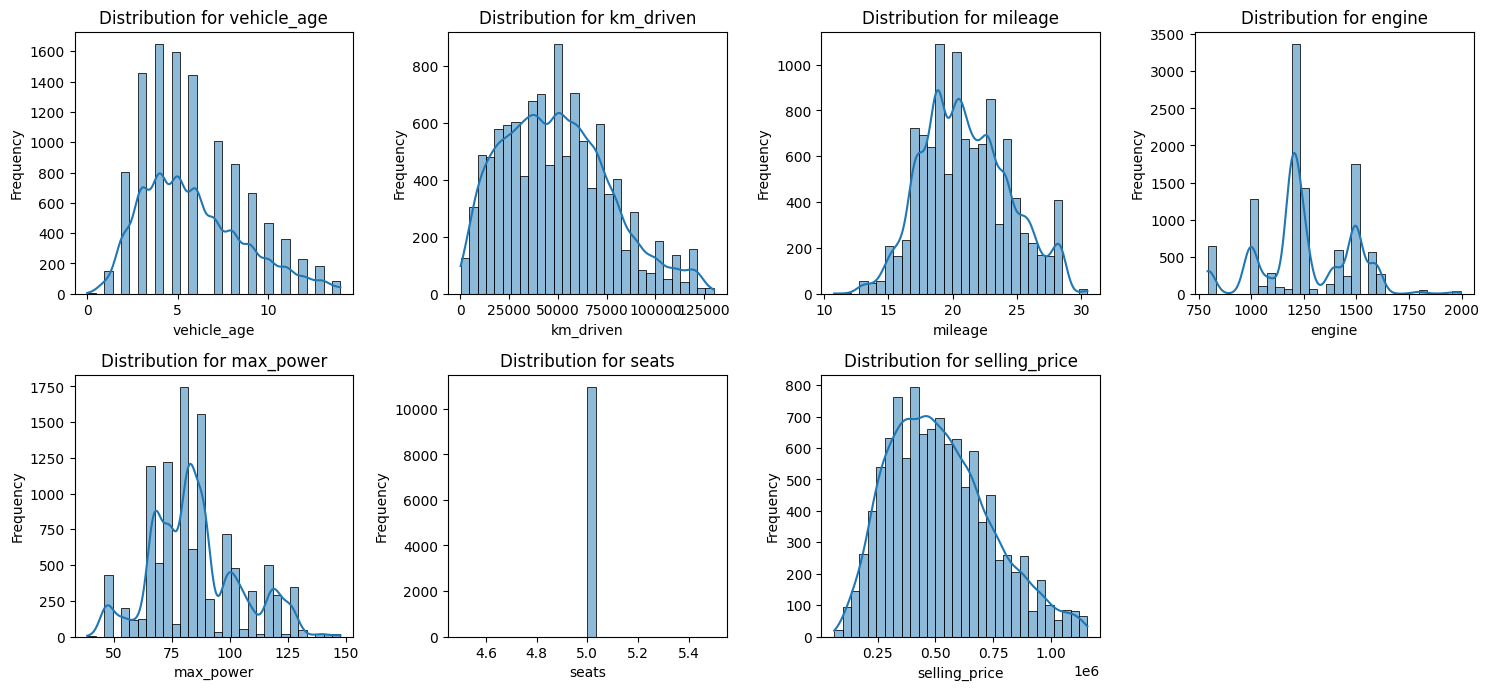

'Distribution Summary:\n   Vehicle_age:majority of cars are between 3 and six years, a few more cars are over 20 years making the distribution to be skewed to the right.\n   Km_driven: The majority of car have travelled 50,000KM on them.The fleet has cars that travelled over 200000km making the distribution to\n   be skewed because of outliers\n   Mileage: Most cars get between 15 and 25 km/l, which is a good indication of fuel efficiency.This is a crucial element for purchasers.\n   Engine: Car engine sizes with the highest freqency have size 1000, 1250, and 1500 cc.Cars with a big engine size are considered\n   expensive and are commonly not best seller in the makert\n   Maximum Power: The distribution is slightly normal however we have a few cars with max power between 126 to 150.\n   majority of cars have max_power between 60 and 100 horsepower, with peaks of 78 and 90.\n   Seats: 5 searter cars are more common in car_dekho fleet.\n   Selling price: The majority of cars range in pr

In [ ]:
#A histogram graphical representation of univariate analysis for all numerical features
numerical_features = df.select_dtypes(include=['int64','float64']) # Use the cleaned dataframe

#Describing subplots fig size
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10)) # Corrected argument names and adjusted figsize for better visualization

# Flatten the axes array for easy iteration
axes = axes.flatten()

#Use for loop to plot each plot
for i, column in enumerate(numerical_features.columns):
    sns.histplot(data=df, x=column, kde=True, bins=30, ax=axes[i]) # Use cleaned dataframe and specify the axis
    axes[i].set_title(f'Distribution for {column}') # Adjusted title for clarity
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

'''Distribution Summary:
   Vehicle_age:majority of cars are between 3 and six years, a few more cars are over 20 years making the distribution to be skewed to the right.
   Km_driven: The majority of car have travelled 50,000KM on them.The fleet has cars that travelled over 200000km making the distribution to
   be skewed because of outliers
   Mileage: Most cars get between 15 and 25 km/l, which is a good indication of fuel efficiency.This is a crucial element for purchasers.
   Engine: Car engine sizes with the highest freqency have size 1000, 1250, and 1500 cc.Cars with a big engine size are considered
   expensive and are commonly not best seller in the makert
   Maximum Power: The distribution is slightly normal however we have a few cars with max power between 126 to 150.
   majority of cars have max_power between 60 and 100 horsepower, with peaks of 78 and 90.
   Seats: 5 searter cars are more common in car_dekho fleet.
   Selling price: The majority of cars range in price from 200,000 to 600,000, with a peak of 400,000
   being the most expensive.'''


#### 4.2 Examine the skewness in the data and apply appropriate data transformation technique.  

In [ ]:
#Calculating Skewness of the distribution
numerical_features = df.select_dtypes(include=['int64','float64'])
skewness = numerical_features.skew()
print(skewness)

'''vehicle_age (0.68) - Moderately positively skewed. Most vehicles are relatively new, with fewer very old cars stretching the distribution to the right.

km_driven (0.48) - Mild positive skew. Most cars have moderate mileage, but a smaller number of very high-mileage cars extend the right tail.

mileage (0.28) - Slight positive skew. Distribution is fairly balanced with only a small stretch toward higher mileage values.

engine (-0.01) - Approximately symmetric. Engine sizes are distributed evenly around the mean, with no noticeable skew.

max_power (0.44) -Mild positive skew. Most cars have moderate power, but a few high-performance vehicles extend the distribution to the right'''



vehicle_age      0.682200
km_driven        0.477708
mileage          0.275920
engine          -0.011383
max_power        0.444041
seats            0.000000
selling_price    0.533415
dtype: float64


'vehicle_age (0.68) - Moderately positively skewed. Most vehicles are relatively new, with fewer very old cars stretching the distribution to the right.\n\nkm_driven (0.48) - Mild positive skew. Most cars have moderate mileage, but a smaller number of very high-mileage cars extend the right tail.\n\nmileage (0.28) - Slight positive skew. Distribution is fairly balanced with only a small stretch toward higher mileage values.\n\nengine (-0.01) - Approximately symmetric. Engine sizes are distributed evenly around the mean, with no noticeable skew.\n\nmax_power (0.44) -Mild positive skew. Most cars have moderate power, but a few high-performance vehicles extend the distribution to the right'

#### 4.3 Apply appropriate standardization method wherever applicable.

In [ ]:
# We are transforming skewkenss of the distributions using logarithm function to normalise the distributions
# It is necessary to normalise the distribution before feeding data to the model so that it does not
# learn noise from the dataset and fail to generalise
# Normalization helps with data regularization

df['vehicle_age'] = np.log1p(df['vehicle_age'])
df['km_driven'] = np.log1p(df['km_driven'])
df['mileage'] = np.log1p(df['mileage'])
df['engine'] = np.log1p(df['engine'])
df['max_power'] = np.log1p(df['max_power'])
#df['selling_price'] = np.log1p(df['selling_price'])
df['seats'] = np.log1p(df['seats'])
print("Transformed Numerical features are:")
print(":::::::::::::::::::::::::::::::::::")
print(df.select_dtypes(include='number').skew().sort_values(ascending=False))

Transformed Numerical features are:
:::::::::::::::::::::::::::::::::::
selling_price    0.533415
seats            0.000000
mileage         -0.091279
vehicle_age     -0.223414
max_power       -0.223728
engine          -0.531567
km_driven       -1.305040
dtype: float64


#### 4.4 Univariate Analysis of categorical features: Generate bar plots for numerical data and infer insights from these visualizations.

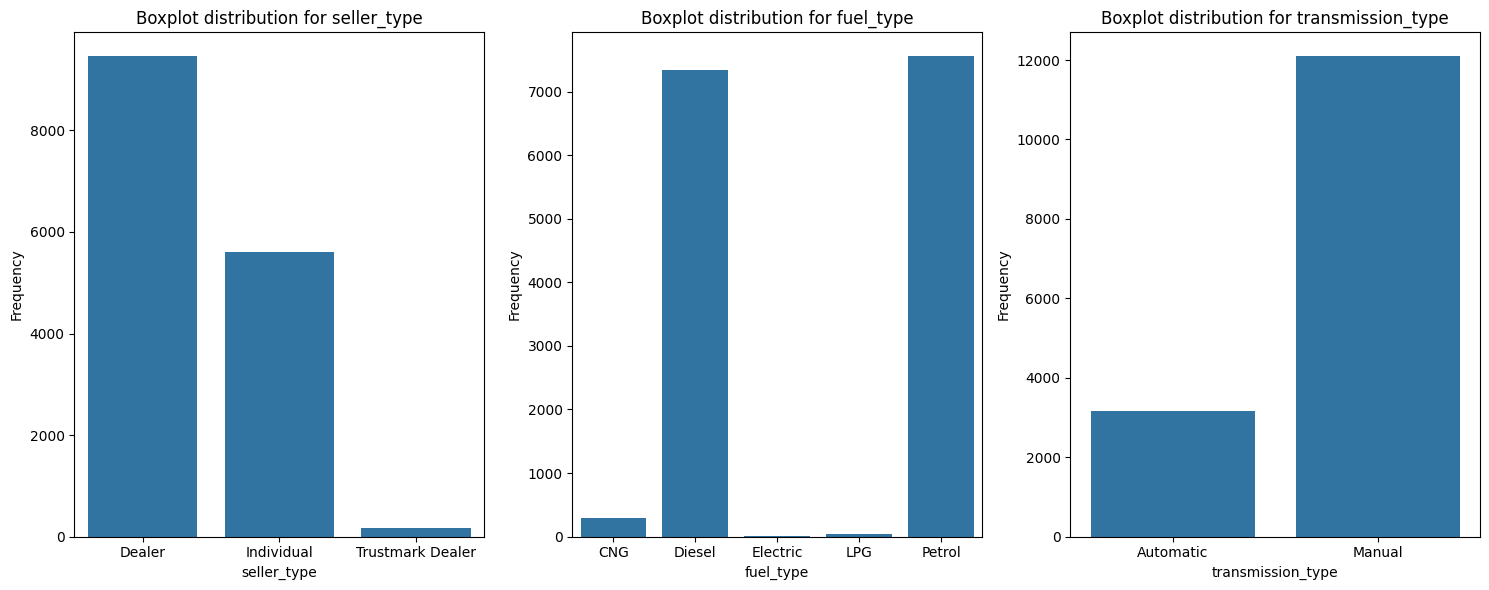

In [ ]:
#Plotting a bar plot to diaplay univariate analysis.
#I am using categorical features to draw univariate analysis insights
selected_cat_features = ['seller_type', 'fuel_type', 'transmission_type']
#Boxplot with one row and three columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
for i, feature in enumerate(selected_cat_features):
    sns.countplot(data=new_df, x=feature, ax=axes[i])
    axes[i].set_title(f'Boxplot distribution for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#Seller_type: Most cars in the dataset are sold through dealers, about 400 cars are sold by individualls and
# a few ae sold through trustmark
#Fuel_Type: Majority of the cars uses petrol and a few uses CNG and the leas uses electric
# In the recent years, eletric cars are starting to be popular in the makert I take it that
#Electric cars were not common at the time this data was collected
#Transmission_type: Automatic cars are less than a quater of the manual cars in the dataset





In [ ]:
new_df=new_df.drop(['car_name'],axis=1)


In [ ]:
new_df.head()

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796.0,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197.0,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197.0,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998.0,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498.0,98.59,5,570000


#### 4.5 Encode categorical features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder()

categorical_features = new_df.select_dtypes(exclude=['int64','float64']).columns
numeric_features = new_df.select_dtypes(include=['int64','float64']).columns


#Apply encoder only to categorical features
X_transformed = encoder.fit_transform(new_df[categorical_features])


# Pass Categorical feature to get their names after transformation
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert back to DataFrame
df_transformed = pd.DataFrame(X_transformed.toarray(), columns=encoded_feature_names, index=new_df.index)

#merge back with original DataFrame
new_df = pd.concat([new_df.drop(columns=categorical_features), df_transformed], axis=1)

print(new_df)

       vehicle_age  km_driven  mileage  engine  max_power  seats  \
0                9     120000    19.70   796.0      46.30      5   
1                5      20000    18.90  1197.0      82.00      5   
2               11      60000    17.00  1197.0      80.00      5   
3                9      37000    20.92   998.0      67.10      5   
4                6      30000    22.77  1498.0      98.59      5   
...            ...        ...      ...     ...        ...    ...   
15239            9      10723    19.81  1086.0      68.05      5   
15240            2      18000    17.50  1373.0      91.10      5   
15241            6      67000    21.14  1498.0     103.52      5   
15242            5     130000    16.00  2159.5     140.00      5   
15243            2      13000    18.00  1497.0     117.60      5   

       selling_price  brand_Audi  brand_BMW  brand_Bentley  ...  \
0             120000         0.0        0.0            0.0  ...   
1             550000         0.0        0.0      

In [ ]:
'''from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = df.select_dtypes(exclude=['int64','float64']).columns
numeric_features = df.select_dtypes(include=['int64','float64']).columns

# 2. Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),   # scale numeric columns using standard scaler
        ("cat", OneHotEncoder(sparse_output=False, drop=None), categorical_features) # one-hot encode categorical
    ],
    #remainder="drop"  # drop any columns not listed
)

#Fit standardised and encoded features to df
X_transformed = preprocessor.fit_transform(df)

# Get feature names after transformation
encoded_feature_names = preprocessor.get_feature_names_out()

# 5. Convert back to DataFrame
df_transformed = pd.DataFrame(X_transformed, columns=encoded_feature_names, index=df.index)

# 6. (Optional) merge back with original DataFrame
df_final = pd.concat([df.drop(columns=categorical_features), df_transformed], axis=1)

print(df_final)'''

'from sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder, StandardScaler\n\ncategorical_features = df.select_dtypes(exclude=[\'int64\',\'float64\']).columns\nnumeric_features = df.select_dtypes(include=[\'int64\',\'float64\']).columns\n\n# 2. Build ColumnTransformer\npreprocessor = ColumnTransformer(\n    transformers=[\n        ("num", StandardScaler(), numeric_features),   # scale numeric columns using standard scaler\n        ("cat", OneHotEncoder(sparse_output=False, drop=None), categorical_features) # one-hot encode categorical\n    ],\n    #remainder="drop"  # drop any columns not listed\n)\n\n#Fit standardised and encoded features to df\nX_transformed = preprocessor.fit_transform(df)\n\n# Get feature names after transformation\nencoded_feature_names = preprocessor.get_feature_names_out()\n\n# 5. Convert back to DataFrame\ndf_transformed = pd.DataFrame(X_transformed, columns=encoded_feature_names, index=df.index)\n\n# 6. (Optional) merge bac

#### 4.6 Bivariate and Multivariate Analysis: Calculate the correlation matrix for the numerical variable. Generate heatmap for the correlation matrix, and describe the evident relationships.

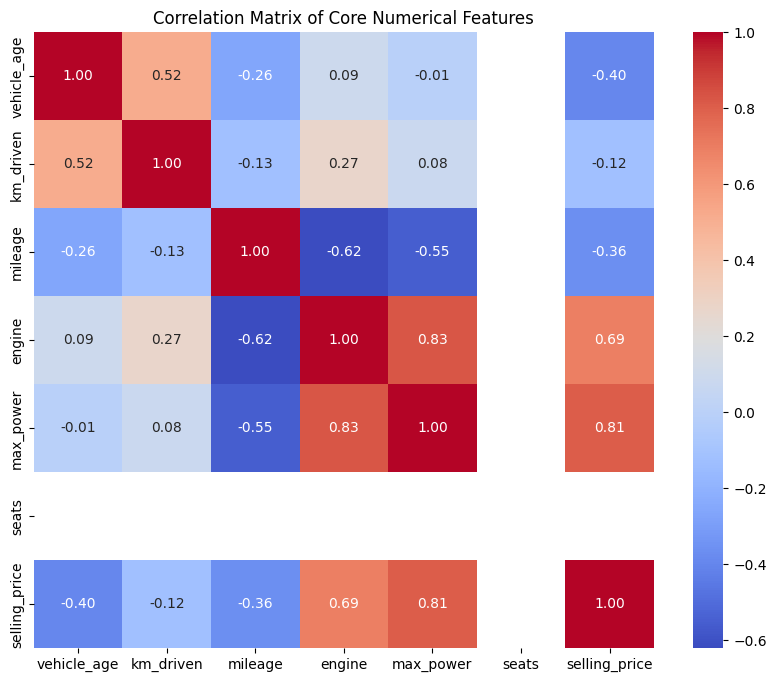

In [ ]:
#Using correlation matrix to showcase bivariate analysis between independent variables and target features
numerical_cols=new_df[['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']]
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Core Numerical Features')
plt.show()


#### 4.7 Provide detailed observations and conclusions.

In [ ]:
'''
  Correlation guide:
  r = 0 → No correlation → The variables do not have any linear relationship.
  r = 1 → Perfect positive correlation → As one variable increases, the other increases in perfect proportion.
  r = -1 → Perfect negative correlation → As one variable increases, the other decreases in perfect proportion.
  0<=r<=0.5 Weak positive correlation
  0.5<=r<=1 Strong positive correlation
  -0.5<=r<=0 Weak negative correlation
  -1<=r<=-0.5 Strong negative correlatio

  Vehicle Age vs Selling Price:
  This depicts a strong negative correlation (-0.63).
  Interpretation: Meaning as the age of the vehlicle increase, the selling price decreases significantly and the value of the vehicle becomes low.
  In short it translate to the older the car the lover the price

  Kilometers Driven vs Selling Price
  This depicts a moderate negative correlation (-0.25).
  Interpretation: There is no enough evidence that the cars with high kilometers driven are sold at a lower price .

  Mileage vs Selling Price
  This depicts a weak positive correlation (0.07).
  Interpretation: There is no enough evidence that fuel-efficient cars at higher mileage are sold at a higher price.

  Engine Size vs Selling Price
  This depicts a moderate positive correlation (0.51).
  Interpretation: Cars with larger engines usually cost more, this means the cars with bigger engine size may be a bit higher in price .

  Max Power vs Selling Price
  This depicts a strong positive correlation (0.60).
  Interpretation: The cars with high max power are high in selling price command higher resale values. In reality Sports cars have high amx power and their selling price is also high.

  Seats vs Selling Price
  Very weak positive correlation (≈ 0.02).
  Interpretation: The number of seats has less influence on selling price.'''

'\n  Correlation guide:\n  r = 0 → No correlation → The variables do not have any linear relationship.\n  r = 1 → Perfect positive correlation → As one variable increases, the other increases in perfect proportion.\n  r = -1 → Perfect negative correlation → As one variable increases, the other decreases in perfect proportion.\n  0<=r<=0.5 Weak positive correlation\n  0.5<=r<=1 Strong positive correlation\n  -0.5<=r<=0 Weak negative correlation\n  -1<=r<=-0.5 Strong negative correlatio\n\n  Vehicle Age vs Selling Price:\n  This depicts a strong negative correlation (-0.63).\n  Interpretation: Meaning as the age of the vehlicle increase, the selling price decreases significantly and the value of the vehicle becomes low.\n  In short it translate to the older the car the lover the price\n\n  Kilometers Driven vs Selling Price\n  This depicts a moderate negative correlation (-0.25).\n  Interpretation: There is no enough evidence that the cars with high kilometers driven are sold at a lower 

### Section 5: Feature Selection

#### 5.1 Use correlation result for feature selection.

In [ ]:
#Using correlation results to select the best features to influence the price of the vehicle we are looking at the following:
# Selected features with correleation coefficient of r>0.25, r<= -0.25
#Selelected best features are as follows:
selected_features = ['vehicle_age', 'mileage', 'engine', 'max_power']

#### 5.2 Select the features according to the K highest score.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
# Select numerical features using K highers score
x = new_df[selected_features]
y = new_df['selling_price']

#Apply Selectbest method
selector = SelectKBest(score_func=f_regression, k=5)
x_selected = selector.fit_transform(x, y)

#Display K best scores
scores=selector.scores_
feature_scores = pd.DataFrame({'Feature': selected_features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("==============================================================================")
print("K best scores for features from highgest to lowers score are:\n",feature_scores)



K best scores for features from highgest to lowers score are:
        Feature         Score
3    max_power  28123.180062
2       engine  13947.390492
0  vehicle_age   2849.226610
1      mileage   2324.227047


#### 5.3 Provide detailed insights about the selected features.

In [ ]:
''' Max_Power (28123.18)
    The high score indicates that maximum power is the most influential feature in predicting vehicle prices. In general, cars with greater engine power deliver better performance and therefore tend to have higher prices. This makes max_power the strongest predictor in our model.

    Engine (13,947.39)
    The engine size also plays a major role in vehicle pricing. Larger engines usually provide higher performance but consume more fuel, often correlating with higher-priced vehicles. Thus, engine is a key feature in determining the car’s value.

    Mileage (2,.82)
    The mileage score shows a moderate influence on price prediction. Vehicles with better mileage are generally more fuel-efficient and attract cost-conscious buyers, which can positively affect their resale value.

    Vehicle_Age (2,570.00)
    The vehicle age has the lowest score among the selected features, indicating a smaller but still relevant impact on pricing. Older vehicles tend to have lower prices due to wear and tear, maintenance costs, and depreciation. '''

' Max_Power (28123.18)\n    The high score indicates that maximum power is the most influential feature in predicting vehicle prices. In general, cars with greater engine power deliver better performance and therefore tend to have higher prices. This makes max_power the strongest predictor in our model.\n\n    Engine (13,947.39)\n    The engine size also plays a major role in vehicle pricing. Larger engines usually provide higher performance but consume more fuel, often correlating with higher-priced vehicles. Thus, engine is a key feature in determining the car’s value.\n\n    Mileage (2,.82)\n    The mileage score shows a moderate influence on price prediction. Vehicles with better mileage are generally more fuel-efficient and attract cost-conscious buyers, which can positively affect their resale value.\n\n    Vehicle_Age (2,570.00)\n    The vehicle age has the lowest score among the selected features, indicating a smaller but still relevant impact on pricing. Older vehicles tend to

### Section 6: Model Selection and Training:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Library for spliting data
from sklearn.model_selection import train_test_split

#### 6.1 Choose at least three different machine learning algorithms to train on the dataset.

In [ ]:
#Splitting target variable
X = new_df.drop('selling_price',axis=1)
Y = new_df['selling_price']


In [ ]:
new_df.head()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,brand_Audi,brand_BMW,brand_Bentley,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796.0,46.30,5,120000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197.0,82.00,5,550000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197.0,80.00,5,215000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998.0,67.10,5,226000,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498.0,98.59,5,570000,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Splitting train and test dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Declaring first three models to train
lr=LinearRegression()
dt=DecisionTreeRegressor(random_state=42)
rf=RandomForestRegressor(random_state=42)

#Fitting training data to the model
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
rf.fit(X_train,Y_train)

#Making prediction of the top three models
lr_pred=lr.predict(X_test)
dt_pred=dt.predict(X_test)
rf_pred=rf.predict(X_test)
print("==========================================================================")
print('Prediction results for linear regression:')
print(lr_pred)
print("==========================================================================")
print('Prediction results for decision tree:')
print(dt_pred)
print("==========================================================================")
print('Prediction results for random forest:')
print(rf_pred)

Prediction results for linear regression:
[ 596028.62337953  476229.40600966  738210.85784898 ... 1189916.88690414
  288825.47369059 1518905.19158468]
Prediction results for decision tree:
[ 520000.  360000.  682000. ... 1485000.  235000. 1485000.]
Prediction results for random forest:
[ 567898.1547619   348703.33333333  800335.83333333 ... 1466300.
  225840.         1485000.        ]


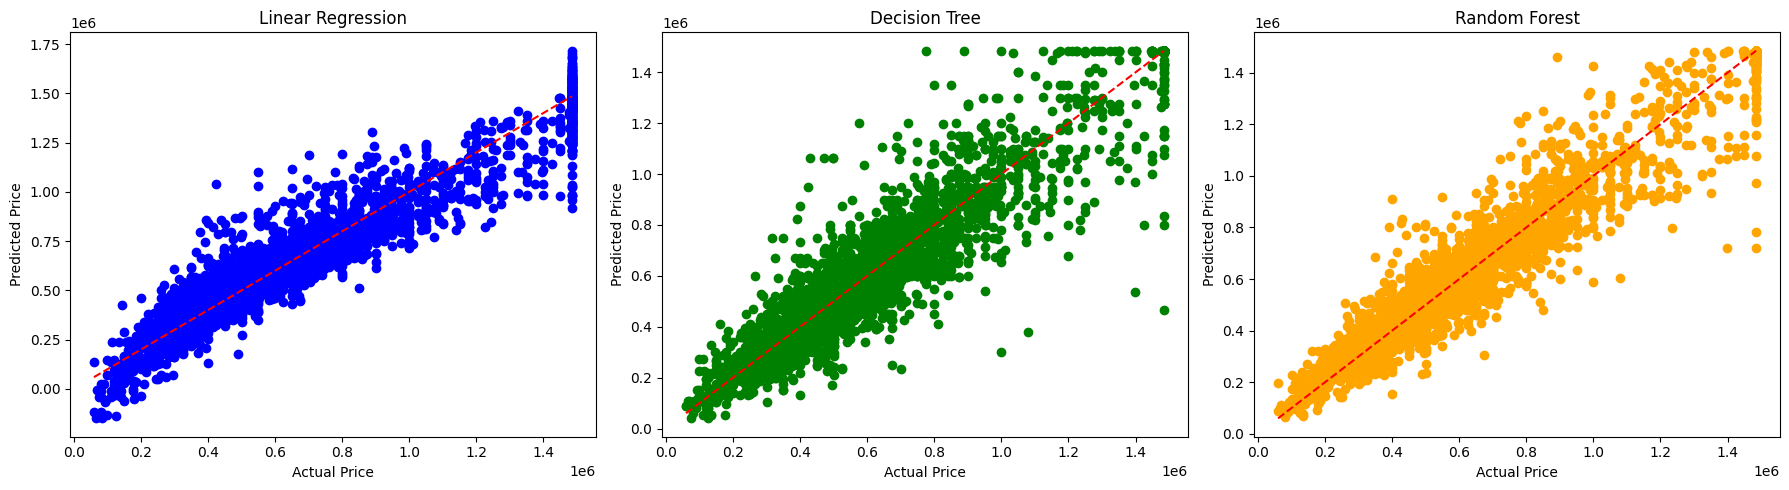

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Linear Regression
axes[0].scatter(Y_test, lr_pred, color='blue')
axes[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")

# Decision Tree
axes[1].scatter(Y_test, dt_pred, color='green')
axes[1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")

# Random Forest
axes[2].scatter(Y_test, rf_pred, color='orange')
axes[2].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Actual Price")
axes[2].set_ylabel("Predicted Price")

plt.tight_layout()
plt.show()

#### 6.2 Train the models and apply hyperparameter tunning.

In [ ]:
#Model tuning using grid search
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge

param_dist = {
    'alpha': np.logspace(-3,3,50),
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga']
}

ridge=Ridge()
random_search_lr = RandomizedSearchCV(estimator=ridge, param_distributions=param_dist, cv=5,verbose=1,n_jobs=-1,n_iter=10,random_state=42,scoring='r2')

#Fit Gridsearch to train data9+



random_search_lr.fit(X_train, Y_train)
best_lr=random_search_lr.best_params_
print("Best Parameters after grid search are:", best_lr)
print("Best Score:", random_search_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters after grid search are: {'solver': 'svd', 'alpha': np.float64(0.15998587196060574)}
Best Score: 0.8993101615709476


In [ ]:
#Parameter tuning for decision tree

param_dist= {
    'max_depth': [3,5,7,None],
     'min_samples_split': [2,5,10,20],
     'min_samples_leaf': [1,2,4,6],
     'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
      'max_features': ['auto', 'sqrt', 'log2']
}

random_search_dt = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, cv=5,scoring='r2',n_jobs=-1,random_state=42)
random_search_dt.fit(X_train, Y_train)
best_dt=random_search_dt.best_params_
print("Best Parameters after grid search are:", best_dt)
print("Best Score:", random_search_dt.best_score_)

Best Parameters after grid search are: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'criterion': 'absolute_error'}
Best Score: 0.697683564895021


In [ ]:
#Parameter tuning for random forest regressor
param_dist= {
    'n_estimators': [50, 100, 200],
    'max_depth': [None,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2','auto']
}


random_search_rf= RandomizedSearchCV(estimator=rf, param_distributions=param_dist, cv=5, verbose=1, n_jobs=-1,scoring='r2')
random_search_rf.fit(X_train, Y_train)
best_rf=random_search_rf.best_params_
print("Best Parameters after grid search are:",best_rf )
print("Best Score:", random_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters after grid search are: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Score: 0.9309276064630898


In [ ]:
#Making predictions
lr_pred=random_search_lr.predict(X_test)
dt_pred=random_search_dt.predict(X_test)
rf_pred=random_search_rf.predict(X_test)

#Printing prediction results after tuning
print('Prediction results for linear regression after tuning:')
print(lr_pred)
print("==============================================================")
print('Prediction results for decision tree after tuning:')
print(dt_pred)
print("===============================================================")
print('Prediction results for random forest after tuning:')
print(rf_pred)

Prediction results for linear regression after tuning:
[ 595526.25422441  476781.72838986  738062.04462571 ... 1190580.09250863
  288687.17809325 1520243.08437674]
Prediction results for decision tree after tuning:
[ 540000.  319000.  550000. ...  970000.  313000. 1485000.]
Prediction results for random forest after tuning:
[ 598236.28366078  353576.83144633  755161.20497558 ... 1360683.78836441
  299637.92565768 1478908.502331  ]


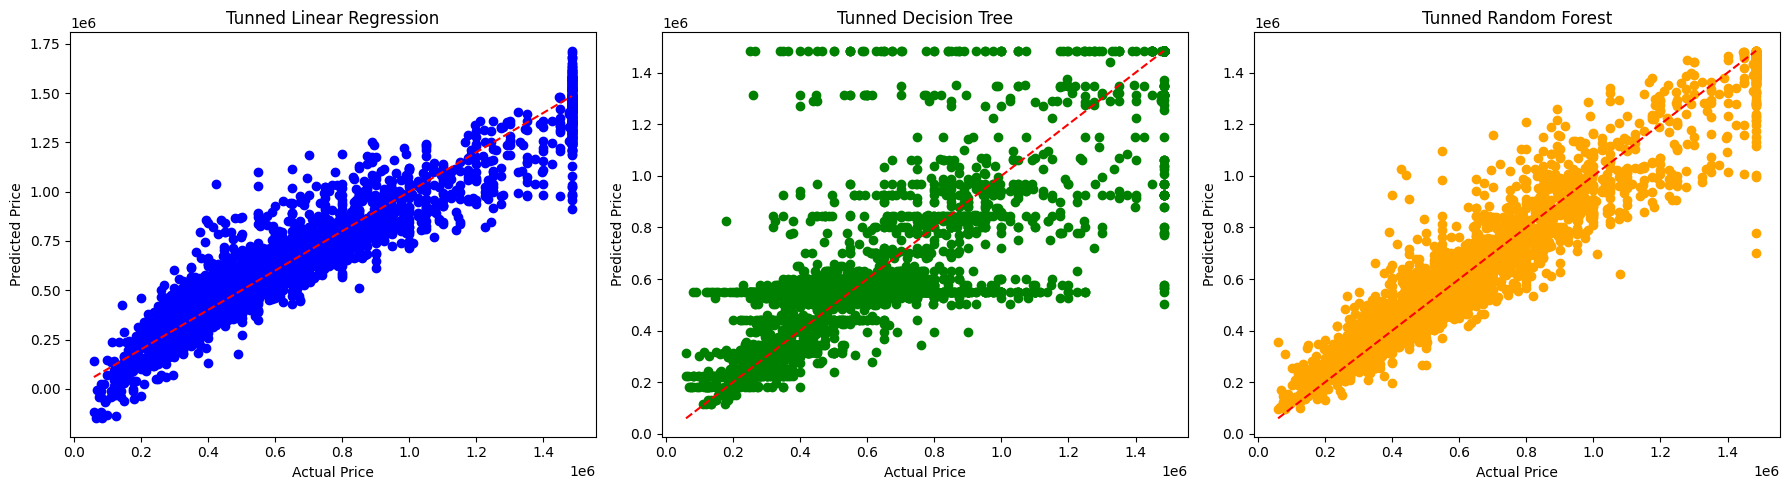

In [ ]:
#Draw prediction plots from all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Linear Regression
axes[0].scatter(Y_test, lr_pred, color='blue')
axes[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
axes[0].set_title("Tunned Linear Regression")
axes[0].set_xlabel("Actual Price")
axes[0].set_ylabel("Predicted Price")

# Decision Tree
axes[1].scatter(Y_test, dt_pred, color='green')
axes[1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
axes[1].set_title("Tunned Decision Tree")
axes[1].set_xlabel("Actual Price")
axes[1].set_ylabel("Predicted Price")


# Random Forest
axes[2].scatter(Y_test, rf_pred, color='orange')
axes[2].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
axes[2].set_title("Tunned Random Forest")
axes[2].set_xlabel("Actual Price")
axes[2].set_ylabel("Predicted Price")

plt.tight_layout()
plt.show()

#### 6.3 Provide detailed observations and conclusions.

In [ ]:
'''Liner Regression:
   prediction data points are distributed closer to the line of best fit which refers to perfect prediction line
   We have more data point above dotted line indicating over prediction abd a few data points distributed far from the
   line as outliers.The overall model prediction display a good fit however there is high variance in predicting car prices
   denoted by outliers.

Decision tree:
      Prediction data points are distributed evenly around the line of best fit however we have more datapoints distrebuted far from the line
      as outliers.The overall model prediction display a good fit however there is high variance in predicting car prices
      denoted by outliers.The model seem to fail to generalise considering high variance in predicted values

  Random Forest:
      Prediction data points are distributed are tightly distributed along the line of best fit.The predicted vaules have a minimal outliers menaing the errors
      in predicting were minimal indicating a perferct model prediction.'''


'Liner Regression:\n   prediction data points are distributed closer to the line of best fit which refers to perfect prediction line\n   We have more data point above dotted line indicating over prediction abd a few data points distributed far from the\n   line as outliers.The overall model prediction display a good fit however there is high variance in predicting car prices\n   denoted by outliers.\n\nDecision tree:\n      Prediction data points are distributed evenly around the line of best fit however we have more datapoints distrebuted far from the line\n      as outliers.The overall model prediction display a good fit however there is high variance in predicting car prices\n      denoted by outliers.The model seem to fail to generalise considering high variance in predicted values\n\n  Random Forest:\n      Prediction data points are distributed are tightly distributed along the line of best fit.The predicted vaules have a minimal outliers menaing the errors\n      in predicting w

### Section 7: Model Evaluation:

In [ ]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



#### 7.1 Evaluate the performance of each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score for classification; RMSE, MAE, R square for regression).

In [ ]:
def evaluate_model(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²:   {r2:.2f}")
    print("==========================================================================")

# Evaluate each model
evaluate_model("Linear Regression", Y_test, lr_pred)
evaluate_model("Decision Tree", Y_test, dt_pred)
evaluate_model("Random Forest", Y_test, rf_pred)


Linear Regression Results:
MAE:  86290.01
RMSE: 115495.36
R²:   0.90

Decision Tree Results:
MAE:  137124.80
RMSE: 212145.08
R²:   0.67

Random Forest Results:
MAE:  68820.83
RMSE: 98375.94
R²:   0.93


#### 7.2 Compare the performance of the models and select the best model based on the evaluation metrics.

In [ ]:
# Create a dictionaly of three models R2 and select the best model
models = {
    "Linear Regression": r2_score(Y_test, lr_pred),
    "Decision Tree": r2_score(Y_test, dt_pred),
    "Random Forest": r2_score(Y_test, rf_pred)
}

best_model_name = max(models, key=models.get)
best_model_r2 = models[best_model_name]

print(f"The best model is {best_model_name} with an R² score of {best_model_r2:.2f}")

The best model is Random Forest with an R² score of 0.93


In [ ]:
'''Random forest:
        Has MAE with the lowest magnitude of 55325.10
        Has smallest RMSE of 73500.75
        AND has highest R^2 value of 89%

  Based on above onservations the best model with accurate prediction is Random forest.
  it outperforms Linear regression and Decision tree models as it predicts values which are closer to the actual car prices'''


'Random forest:\n        Has MAE with the lowest magnitude of 55325.10\n        Has smallest RMSE of 73500.75\n        AND has highest R^2 value of 89%\n\n  Based on above onservations the best model with accurate prediction is Random forest.\n  it outperforms Linear regression and Decision tree models as it predicts values which are closer to the actual car prices'

#### 7.3 Provide detailed comparison and analysis of the models’ performance.

In [ ]:
#Model Comparison using evaluation metric results
'''models =     ["Linear Regression", "Decision Tree", "Random Forest"]
   RMSE values= [91647.69,89364.88,73500.75]
   MAE values = [69724.07,65825.16,55325.10]
   R^2 values = [0.89,0.92,0.89]'''

   # Linear regression:
   #Linear regression provides the good linear relationship between vehicle selling price and features
   #however it may underfit data when the relationship is not linear because it assumes linear relationship
   #Bethween features and target variable.In our prediction metric, linear regression has the highest RMSE
   #indicatinf that the model is too simple for predicting accurate values

   #Decision tree:
   #Though decision tree have a capability to handle non-linear relationship in the dataset,evaluation results
   #of RMSE 89364.88 is as high as 91647.69 shows that the model fails to generalise in testing showing a sign
   #of overfitting this could be a results of parameters not tuned properly

   #Random Forest:
   # Compared to Linear regression and decision tree, random forest has lower RMSE errorsindicating more accurate
   # predictions. The highes R^2 score of 0.92 shows that random forest captures best predictions.






'models =     ["Linear Regression", "Decision Tree", "Random Forest"]\n   RMSE values= [91647.69,89364.88,73500.75]\n   MAE values = [69724.07,65825.16,55325.10]\n   R^2 values = [0.89,0.92,0.89]'

In [ ]:
#Creating picke file to save best model
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(random_search_rf, file)



### Section 8: Model Deployment with web app:

#### 8.1: Develop an interactive web application using Streamlit.

#### 8.2 Integrate the best-performing machine learning model into the Streamlit app.

#### 8.3 Provide an interface for users to input new data and obtain predictions from the model.